In [1]:
import depoSimulator_symmetry
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import torch
import pyvista as pv
import pandas as pd
from scipy import interpolate

In [7]:
erosion = pd.read_excel('./erosionData.xlsx')
print(erosion)

           r   Erosion(mm)        残量       measure
0     0.0000 -2.034461e-11  7.000000 -6.781538e-12
1     1.0000 -6.023260e-03  7.006023 -2.007753e-03
2     2.0005 -2.159309e-02  7.021593 -7.197696e-03
3     3.0000 -1.370934e-02  7.013709 -4.569781e-03
4     4.0000  2.212784e-02  6.977872  7.375946e-03
..       ...           ...       ...           ...
94  216.0005  1.312395e-01  6.868760  4.374650e-02
95  217.0005  6.416731e-02  6.935833  2.138910e-02
96  218.0005  2.548579e-03  6.997451  8.495265e-04
97  219.0005 -1.811668e-02  7.018117 -6.038893e-03
98  220.0000  1.067665e-02  6.989323  3.558885e-03

[99 rows x 4 columns]


In [8]:
r = erosion['r'].to_numpy()/1000
measure = erosion['measure'].to_numpy()
minus_m = measure < 0
measure[minus_m] = 0
print(measure)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.37594558e-03 1.68061650e-02 2.42206914e-02 3.86201376e-02
 4.45037823e-02 5.70383620e-02 7.13913265e-02 8.52285051e-02
 1.12383417e-01 1.32523008e-01 1.61813558e-01 1.92421919e-01
 2.32514633e-01 2.66759135e-01 3.15154564e-01 3.51034208e-01
 3.90731662e-01 4.25414083e-01 4.70414019e-01 5.08231783e-01
 5.47367559e-01 5.86820402e-01 6.18925365e-01 6.47847559e-01
 6.69921114e-01 6.96479387e-01 7.24021238e-01 7.72727179e-01
 7.99869605e-01 8.15284918e-01 8.26137119e-01 8.31593927e-01
 8.11798996e-01 7.45949804e-01 6.85878403e-01 6.34086305e-01
 5.78240797e-01 5.43341024e-01 5.17053070e-01 5.18711393e-01
 5.17147464e-01 5.16195779e-01 5.27856335e-01 5.40463242e-01
 5.62184908e-01 5.76349044e-01 5.89457860e-01 6.06515888e-01
 6.25351112e-01 6.51129963e-01 6.97024108e-01 7.49030638e-01
 7.95645054e-01 8.46377355e-01 8.65055447e-01 8.64507697e-01
 8.68077208e-01 8.71255215e-01 8.94713462e-01 9.41617333e-01
 9.66002245e-01 9.929946

In [9]:
erosion_func = interpolate.interp1d(r, measure, kind='quadratic')

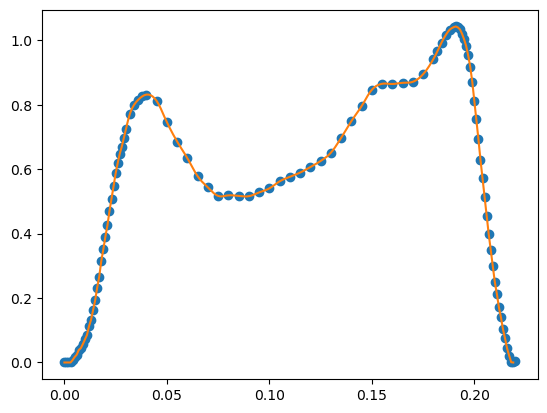

In [10]:
xnew = np.arange(0, 0.22, 0.001)
ynew = erosion_func(xnew)   # use interpolation function returned by `interp1d`
plt.plot(r, measure, 'o', xnew, ynew, '-')
plt.show()

In [11]:
erosion_bins = 200
erosion_r = np.arange(0, 0.22, 0.22/erosion_bins)
erosion_r = erosion_r + 0.22/erosion_bins/2
# print(erosion_r)

erosion_event = erosion_func(erosion_r)
erosion_event_minus = erosion_event < 0
erosion_event[erosion_event_minus] = 0
for i in range(erosion_event.shape[0]):
    erosion_event[i] *= (0.22/erosion_bins)**2 + 2*i*(0.22/erosion_bins)**2
erosion_event *= 2e7
print(erosion_event)

[0.00000000e+00 7.73766247e-03 0.00000000e+00 1.01596308e+00
 3.57471094e+00 6.59925720e+00 1.25811059e+01 1.70204230e+01
 2.55649346e+01 3.52831622e+01 5.08248293e+01 6.96158770e+01
 9.32988695e+01 1.22291329e+02 1.61830158e+02 2.01700571e+02
 2.56633691e+02 3.05441777e+02 3.60726615e+02 4.20182436e+02
 4.87865560e+02 5.55083748e+02 6.28899588e+02 6.98740236e+02
 7.66708168e+02 8.28274468e+02 8.98617078e+02 9.72552600e+02
 1.04683872e+03 1.11464890e+03 1.17375132e+03 1.22843993e+03
 1.27988255e+03 1.33022604e+03 1.37912635e+03 1.42578143e+03
 1.46931434e+03 1.50889128e+03 1.54418101e+03 1.57454280e+03
 1.59909507e+03 1.61743582e+03 1.62917069e+03 1.63427332e+03
 1.63771375e+03 1.64125419e+03 1.64500236e+03 1.64906598e+03
 1.65338919e+03 1.65769114e+03 1.66203168e+03 1.66648461e+03
 1.67105246e+03 1.67388778e+03 1.67408644e+03 1.67156294e+03
 1.66623183e+03 1.65932213e+03 1.65495813e+03 1.65363464e+03
 1.65556226e+03 1.66091177e+03 1.66718248e+03 1.67278727e+03
 1.67772600e+03 1.681998

(656436,)


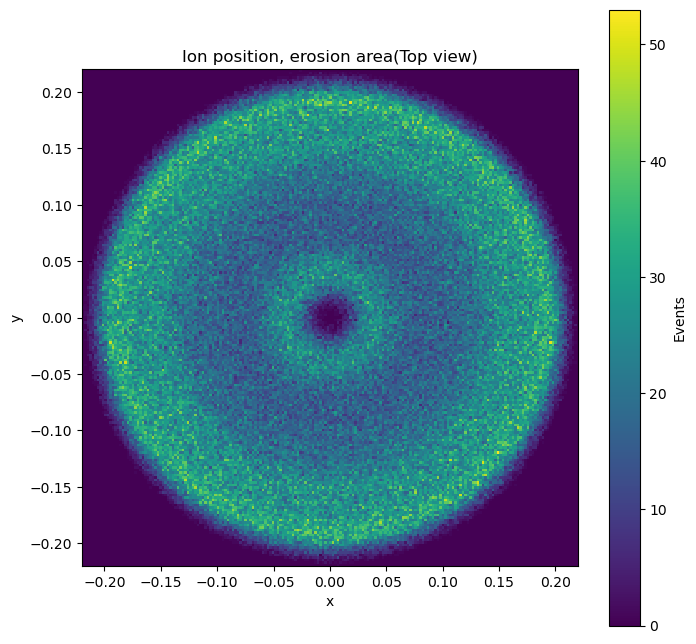

In [12]:
gen_dist_x = np.array([])
gen_dist_y = np.array([])

# r = np.linspace(0, 0.22, 22)
bins = 200
r = 0.22/bins

for i in range(bins):
    # print(i)
    # print(erosion_event[0][i])
    theta = np.random.rand(int(erosion_event[i]))*2*np.pi
    # print(theta.shape)
    # print(np.multiply((np.random.rand(int(erosion_event[0][i]))*0.01 + i*0.01), np.cos(theta)).shape)
    gen_dist_x = np.concatenate((gen_dist_x, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.cos(theta))))
    # print(np.array(gen_dist_x).shape)
    gen_dist_y = np.concatenate((gen_dist_y, np.multiply((np.random.rand(int(erosion_event[i]))*r + i*r), np.sin(theta))))

print(gen_dist_x.shape)

xbins = np.linspace(-0.22,0.22,200)
ybins = np.linspace(-0.22,0.22,200)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

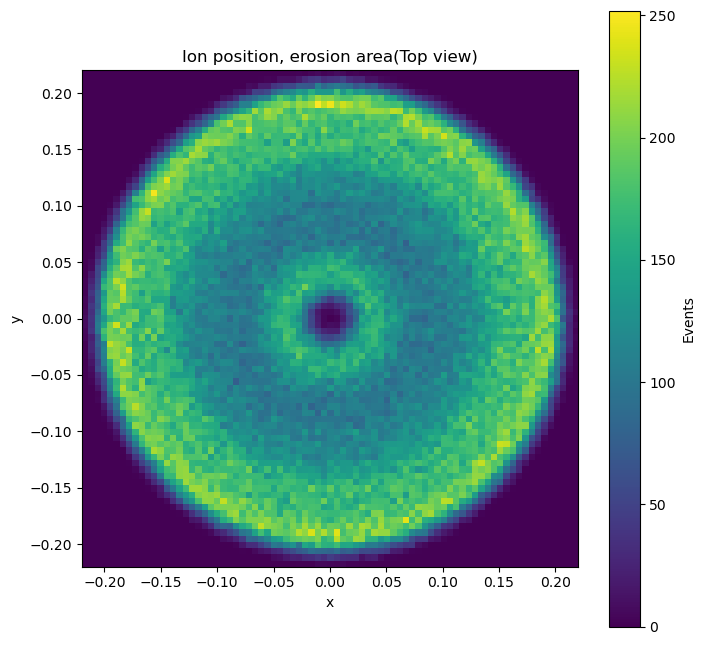

Widget(value='<iframe src="http://localhost:53863/index.html?ui=P_0x2168decaf90_0&reconnect=auto" class="pyvis…

In [13]:
xbins = np.linspace(-0.22,0.22,80)
ybins = np.linspace(-0.22,0.22,80)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(gen_dist_x, bins=xbins)
y_bins = np.histogram(gen_dist_y, bins=ybins)

H, xedges, yedges = np.histogram2d(gen_dist_x, gen_dist_y, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

xbins = np.linspace(-22,22,79)
ybins = np.linspace(-22,22,79)
x, y = np.meshgrid(xbins, ybins)

grid = pv.StructuredGrid(x, y, H/200)
grid.plot()

In [189]:
gen_dist_x

array([ 0.00355215, -0.0045415 , -0.00339772, ..., -0.11116291,
       -0.02663402,  0.00758988])

In [5]:
def rfunc(x): #Release factor function
    # print("-------rfunc------")
    # print(x)
    n = 1
    beta = 0
    y = np.cos(x) ** n * (1 + beta * np.cos(x) ** 2)# * (n ** 2 + 4 * n + 3) / (n * beta + n + beta + 3) /2 / pi
    return y

In [6]:
def rfunc_2(x): #Release factor function
    # print("-------rfunc------")
    # print(x)
    n = 1
    y = np.cos(x) ** n 
    return y

In [7]:
theta_bins_size = 100
theta_bins = np.linspace(-np.pi/2, np.pi/2, theta_bins_size)
theta_hist_x = theta_bins + np.pi/((theta_bins_size-1)*2)
theta_hist_x = theta_hist_x[:-1]

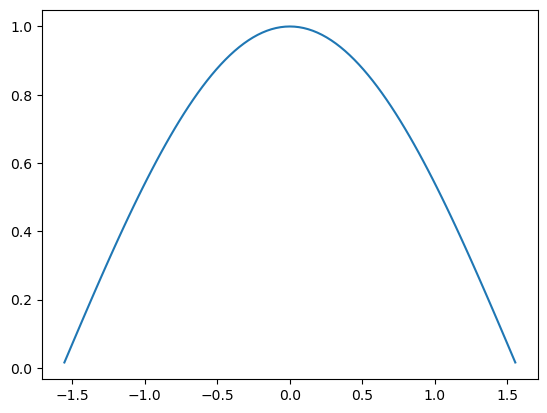

In [8]:
theta_hist_y = rfunc_2(theta_hist_x)

fig, ax = plt.subplots(1, 1)

ax.plot(theta_hist_x, theta_hist_y)

In [9]:
print(theta_hist_y.shape)
theta_hist_y *= 1e6
print(theta_hist_y.max())
print(theta_hist_y.sum())

(99,)
1000000.0
63028001.98032255


In [10]:
theta_sample = np.array([])

for i in range(theta_bins.shape[0] - 1):
    theta_sample = np.concatenate(( theta_sample, np.random.uniform(theta_bins[i], theta_bins[i+1], int(theta_hist_y[i]))))

(63027946,)


(array([ 15726.,  46798.,  77817., 108778., 139549., 170209., 200997.,
        231237., 261183., 291110., 321029., 349804., 379515., 406979.,
        435955., 463256., 490042., 517637., 543619., 569955., 594055.,
        617945., 644329., 665175., 690029., 710408., 732397., 752744.,
        772775., 791637., 810347., 826401., 844467., 859396., 875130.,
        889144., 902425., 914447., 925477., 937128., 945509., 954406.,
        963109., 969512., 975345., 980387., 983237., 985634., 988903.,
        990478., 990418., 988490., 986852., 983488., 980640., 974477.,
        970126., 962384., 954131., 946582., 936592., 925208., 914947.,
        903157., 888210., 875370., 859136., 844510., 827279., 809470.,
        791746., 772737., 753192., 731693., 711165., 689130., 666080.,
        643181., 618752., 594490., 569662., 543192., 517191., 490603.,
        463090., 435944., 407444., 378810., 350516., 320345., 291603.,
        260964., 231417., 200879., 170373., 139594., 108732.,  77865.,
      

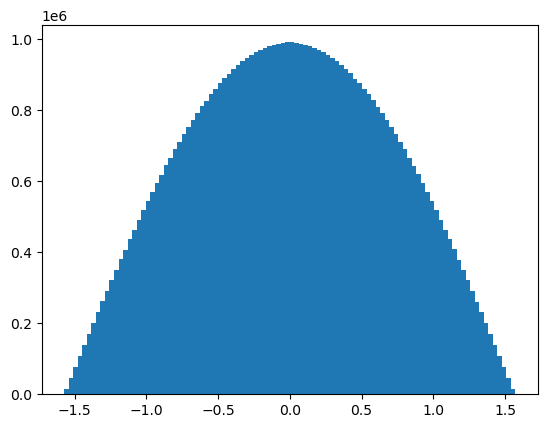

In [11]:
print(theta_sample.shape)
plt.hist(theta_sample, bins=100)

In [12]:
np.random.shuffle(theta_sample)
# np.save('thetaSampe_Al_1p6',theta_sample)

(array([  7.,   9.,  18.,  15.,  27.,  38.,  34.,  38.,  40.,  47.,  54.,
         61.,  61.,  69.,  71.,  79.,  73.,  85.,  87.,  89.,  96.,  98.,
         92., 104., 106., 124., 126., 114., 132., 123., 138.,  99., 162.,
        130., 145., 110., 157., 140., 159., 149., 156., 163., 155., 160.,
        139., 165., 169., 145., 164., 137., 156., 160., 141., 160., 163.,
        168., 154., 144., 143., 152., 146., 148., 164., 141., 137., 134.,
        139., 130., 127., 116., 125., 121., 127., 111., 104., 101.,  90.,
         91.,  90.,  89.,  79.,  90.,  85.,  77.,  75.,  74.,  61.,  70.,
         53.,  55.,  53.,  40.,  33.,  38.,  21.,  20.,  13.,  18.,  10.,
          4.]),
 array([-1.55297188, -1.52179291, -1.49061394, -1.45943497, -1.42825601,
        -1.39707704, -1.36589807, -1.3347191 , -1.30354013, -1.27236116,
        -1.2411822 , -1.21000323, -1.17882426, -1.14764529, -1.11646632,
        -1.08528736, -1.05410839, -1.02292942, -0.99175045, -0.96057148,
        -0.92939251, -0.89

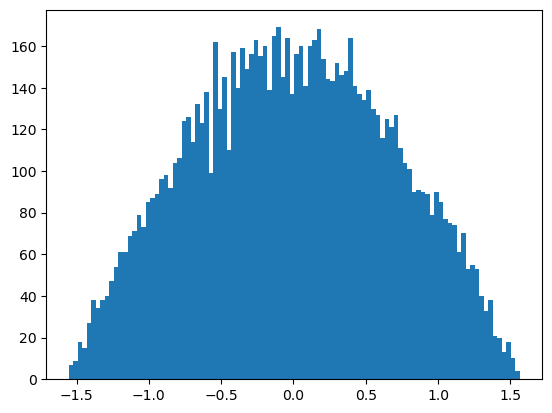

In [14]:
plt.hist(theta_sample[:10000], bins=100)

In [15]:
theta_sample.shape

(63027946,)

In [ ]:
theta_sample[np.random.choice(0, theta_sample.shape[0], 2)]

In [59]:
T = 750
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al

In [60]:
def max_velocity_u(Cm, random1, random2):
    return Cm*np.sqrt(-np.log(random1))*np.cos(2*np.pi*random2)

def max_velocity_w(Cm, random1, random2):
    return Cm*np.sqrt(-np.log(random1))*np.sin(2*np.pi*random2)

def max_velocity_v(Cm, random3):
    return -Cm*np.sqrt(-np.log(random3))

In [87]:
N = gen_dist_x.shape[0]

T = 2000
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al

Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)

velosity_matrix = np.array([max_velocity_u(Cm, Random1, Random2), max_velocity_w(Cm, Random1, Random2), max_velocity_v(Cm, Random3)]).T

print(velosity_matrix.shape)

(656436, 3)


(656436,)


C:\Users\URCS049\AppData\Local\Temp\ipykernel_13160\711687607.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


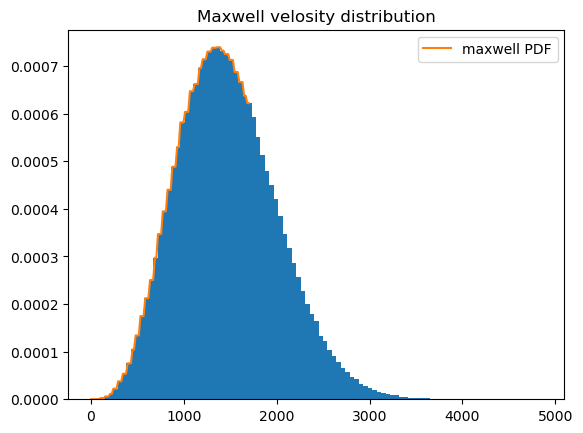

In [88]:
velosity_norm = np.linalg.norm(velosity_matrix, axis=1)
print(velosity_norm.shape)

# fig, ax = plt.subplots(1, 1)

# maxwell = ax.hist(velosity_norm, density=False, bins=100, histtype='step')
maxwellDist = np.histogram(velosity_norm, bins=100)

import scipy.stats

hist_dist = scipy.stats.rv_histogram(maxwellDist, density=False)

X = np.linspace(0, 1700.0, 100)
fig, ax = plt.subplots()
ax.set_title("Maxwell velosity distribution")
ax.hist(velosity_norm, density=True, bins=100)
ax.plot(X, hist_dist.pdf(X), label='maxwell PDF')

# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
fig.show()

In [92]:
print(X)

[0.         0.00505051 0.01010101 0.01515152 0.02020202 0.02525253
 0.03030303 0.03535354 0.04040404 0.04545455 0.05050505 0.05555556
 0.06060606 0.06565657 0.07070707 0.07575758 0.08080808 0.08585859
 0.09090909 0.0959596  0.1010101  0.10606061 0.11111111 0.11616162
 0.12121212 0.12626263 0.13131313 0.13636364 0.14141414 0.14646465
 0.15151515 0.15656566 0.16161616 0.16666667 0.17171717 0.17676768
 0.18181818 0.18686869 0.19191919 0.1969697  0.2020202  0.20707071
 0.21212121 0.21717172 0.22222222 0.22727273 0.23232323 0.23737374
 0.24242424 0.24747475 0.25252525 0.25757576 0.26262626 0.26767677
 0.27272727 0.27777778 0.28282828 0.28787879 0.29292929 0.2979798
 0.3030303  0.30808081 0.31313131 0.31818182 0.32323232 0.32828283
 0.33333333 0.33838384 0.34343434 0.34848485 0.35353535 0.35858586
 0.36363636 0.36868687 0.37373737 0.37878788 0.38383838 0.38888889
 0.39393939 0.3989899  0.4040404  0.40909091 0.41414141 0.41919192
 0.42424242 0.42929293 0.43434343 0.43939394 0.44444444 0.44949

(656436,)


C:\Users\URCS049\AppData\Local\Temp\ipykernel_13160\4094580875.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


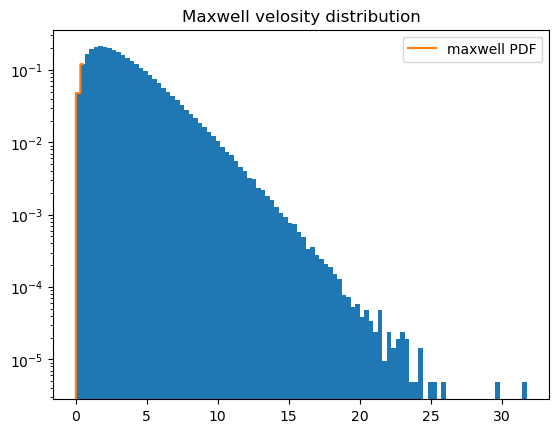

In [85]:
N_A = 6.02214076*10**23
AlMass = 26.982/(N_A*1000)
ev = 1.602176634e-19
velosity_norm_ev = 1/2 *AlMass* (velosity_norm**2) / ev
print(velosity_norm_ev.shape)

# fig, ax = plt.subplots(1, 1)

# maxwell = ax.hist(velosity_norm, density=False, bins=100, histtype='step')
maxwellDist = np.histogram(velosity_norm_ev, bins=100)

hist_dist = scipy.stats.rv_histogram(maxwellDist, density=False)

X = np.linspace(0, 0.5, 100)
fig, ax = plt.subplots()
ax.set_title("Maxwell velosity distribution")
ax.hist(velosity_norm_ev, density=True, bins=100)
ax.plot(X, hist_dist.pdf(X), label='maxwell PDF')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
fig.show()

In [4]:
def Energy_theta_func(C, enery, theta):
    U = 3.36 #binding
    m = 0.212
    Alpha = 0.14
    n = 0.5
    A = 13
    # m_t = 44.803928e-27
    # m_i = 66.335e-27
    m_t = 27
    m_i = 40
    q = 2 - m_t/(4*m_i)
    Q = 0.55
    E_inc = 437 # eVsb Vsb self bias
    return C * enery/(enery + U)**(3-2*m)*(1 - ((U + enery)/(U + Alpha*E_inc))**n)*np.exp(-A*((m_i/m_t)*((U + enery * np.cos(theta)**q)/E_inc))**Q)

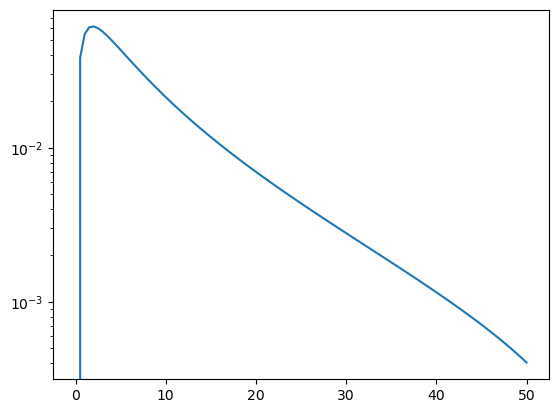

In [94]:
theta = 0.45*np.pi
enery = np.linspace(0, 50, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, Energy_theta_func(10, enery, theta))
ax.set_yscale('log')

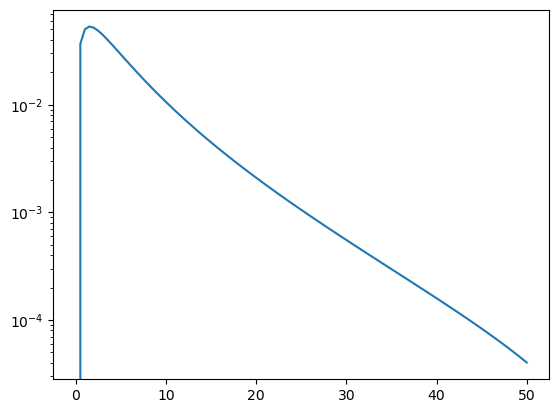

In [106]:
theta = 0.25*np.pi
enery = np.linspace(0, 50, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, Energy_theta_func(10, enery, theta))
ax.set_yscale('log')

In [95]:
print(Energy_theta_func(10, enery, theta))

[0.         0.03853362 0.05484574 0.06065763 0.06135152 0.05954878
 0.05657971 0.05313686 0.04958415 0.0461108  0.04281107 0.03972695
 0.03687171 0.03424298 0.03183023 0.02961907 0.02759362 0.02573791
 0.02403657 0.02247525 0.02104075 0.01972104 0.01850526 0.01738363
 0.01634736 0.01538859 0.01450023 0.01367597 0.01291013 0.01219762
 0.01153384 0.01091469 0.01033645 0.00979578 0.00928965 0.00881533
 0.00837034 0.00795242 0.00755955 0.00718984 0.00684163 0.00651334
 0.00620358 0.00591105 0.00563457 0.00537304 0.00512547 0.00489093
 0.00466859 0.00445767 0.00425743 0.00406722 0.00388642 0.00371446
 0.00355081 0.00339498 0.00324651 0.00310498 0.00296999 0.00284118
 0.0027182  0.00260074 0.00248848 0.00238116 0.00227851 0.00218029
 0.00208627 0.00199622 0.00190996 0.00182728 0.00174802 0.001672
 0.00159906 0.00152906 0.00146185 0.00139731 0.00133531 0.00127572
 0.00121845 0.00116338 0.00111042 0.00105946 0.00101043 0.00096323
 0.00091779 0.00087404 0.00083189 0.00079128 0.00075214 0.000714

In [97]:
print(theta_hist_y)
print(theta_hist_x)

[0.00132029 0.0076422  0.01723792 0.02935974 0.04355109 0.05945759
 0.07677288 0.09521694 0.11452633 0.13444963 0.15474557 0.1751826
 0.19553934 0.21560548 0.23518294 0.25408717 0.27214851 0.2892134
 0.30514562 0.31982732 0.33315986 0.34506448 0.35548279 0.36437696
 0.37172971 0.37754407 0.38184289 0.38466807 0.38607966 0.38615462
 0.38498548 0.38267877 0.37935328 0.37513816 0.37017097 0.36459558
 0.35855999 0.35221418 0.34570788 0.33918838 0.33279847 0.32667429
 0.32094344 0.31572317 0.31111865 0.30722154 0.30410867 0.30184094
 0.30046247 0.3        0.30046247 0.30184094 0.30410867 0.30722154
 0.31111865 0.31572317 0.32094344 0.32667429 0.33279847 0.33918838
 0.34570788 0.35221418 0.35855999 0.36459558 0.37017097 0.37513816
 0.37935328 0.38267877 0.38498548 0.38615462 0.38607966 0.38466807
 0.38184289 0.37754407 0.37172971 0.36437696 0.35548279 0.34506448
 0.33315986 0.31982732 0.30514562 0.2892134  0.27214851 0.25408717
 0.23518294 0.21560548 0.19553934 0.1751826  0.15474557 0.134449

In [109]:
enery = np.linspace(0, 50, 100)
Energy_theta_func(10, enery[1], theta_hist_x[1]) * theta_hist_y[1] *1e6

295.2832449059548

In [153]:
print(theta_hist_x.min())

-1.5549296972313118


In [135]:
enery_bins = np.linspace(0, 50, 100)

energy_theta_tuple = []
for j in range(theta_hist_x.shape[0]):
    enery_sample = np.array([])
    for i in range(enery_bins.shape[0] - 1):
        enery_sample = np.concatenate(( enery_sample, np.random.uniform(enery_bins[i], enery_bins[i+1], int(Energy_theta_func(10, enery_bins[i], theta_hist_x[j]) *1e6))))
    energy_theta_tuple.append(enery_sample)


    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\URCS049\AppData\Local\Temp\ipykernel_13160\1458846735.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


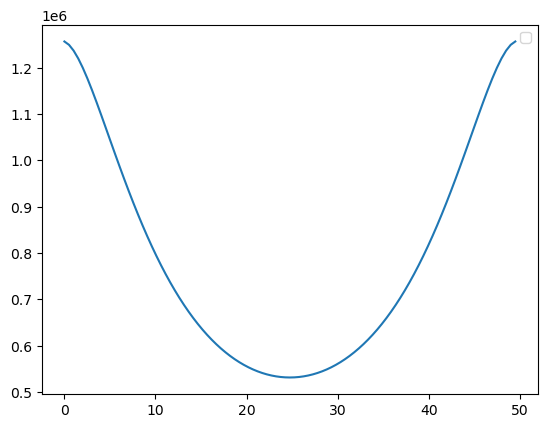

In [136]:
fig, ax = plt.subplots()
ax.plot(enery_bins[:-1], [np.array(energy_theta_tuple[i]).shape[0] for i in range(len(energy_theta_tuple))])
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
fig.show()

In [113]:
print(enery_sample.shape)

(9405,)


In [163]:
for i in range(len(energy_theta_tuple)):
    np.random.shuffle(energy_theta_tuple[i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\URCS049\AppData\Local\Temp\ipykernel_13160\3021727046.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


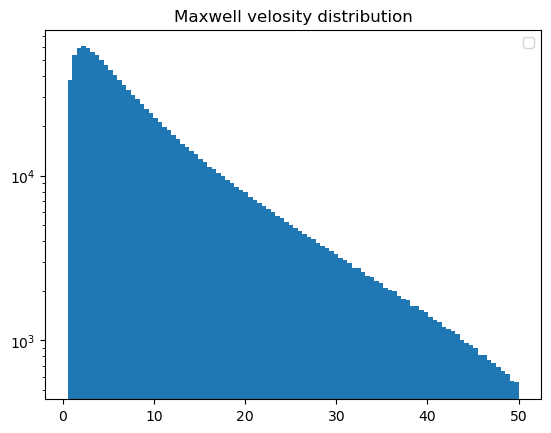

In [164]:
fig, ax = plt.subplots()
ax.set_title("Maxwell velosity distribution")
ax.hist(energy_theta_tuple[0], bins=100)
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()
fig.show()

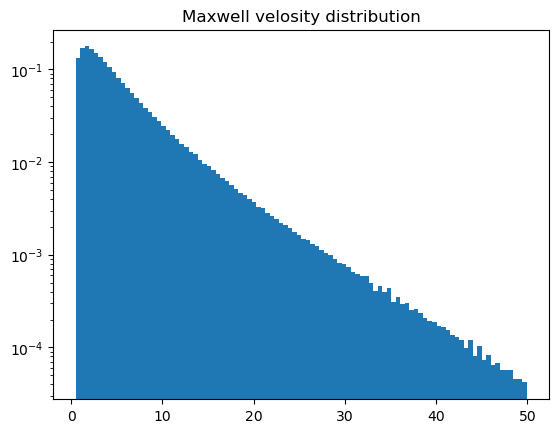

In [165]:
fig, ax = plt.subplots()
ax.set_title("Maxwell velosity distribution")
ax.hist(energy_theta_tuple[50], density=True, bins=100)
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')

(array([  34.,  172.,  410.,  739., 1059., 1491., 1817., 2316., 2723.,
        3222., 3706., 4278., 4689., 5172., 5653., 6112., 6438., 6925.,
        7481., 7672., 8078., 8286., 8702., 8888., 9091., 9114., 9268.,
        9606., 9455., 9535., 9303., 9404., 9135., 9220., 9105., 8831.,
        8909., 8678., 8355., 8375., 8213., 8101., 7935., 7716., 7604.,
        7482., 7535., 7511., 7255., 7319., 7289., 7345., 7307., 7378.,
        7605., 7506., 7965., 7861., 8170., 8334., 8304., 8378., 8535.,
        8858., 8942., 9132., 9229., 9247., 9444., 9452., 9317., 9483.,
        9399., 9274., 9007., 9100., 8766., 8519., 8310., 8187., 7645.,
        7479., 7057., 6556., 6194., 5644., 5304., 4738., 4290., 3741.,
        3262., 2690., 2313., 1851., 1487., 1035.,  711.,  440.,  200.,
          38.]),
 array([-1.57067646e+00, -1.53927686e+00, -1.50787726e+00, -1.47647766e+00,
        -1.44507806e+00, -1.41367846e+00, -1.38227886e+00, -1.35087926e+00,
        -1.31947966e+00, -1.28808006e+00, -1.25668

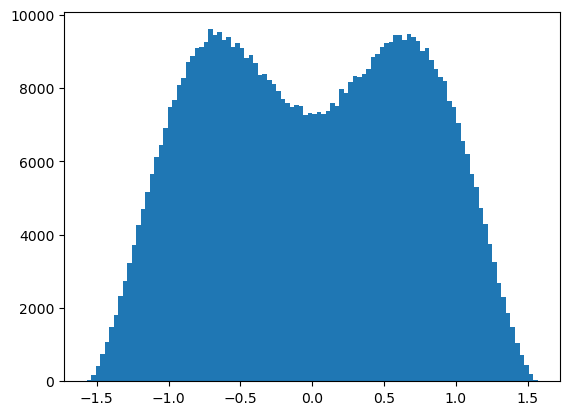

In [148]:
plt.hist(theta_sample[:int(gen_dist_x.shape[0])], bins=100)

In [156]:
test_sample = theta_sample[:int(gen_dist_x.shape[0])]
print(test_sample.min())
# test_sample = np.abs(test_sample)
# print(test_sample.min())


-1.5706764592323406


In [181]:
theta_hist_sample = np.histogram(test_sample, bins=99)
print(theta_hist_sample[0].shape)
print(theta_hist_sample)

(99,)
(array([  35,  177,  412,  762, 1101, 1520, 1861, 2362, 2792, 3263, 3805,
       4420, 4770, 5264, 5795, 6273, 6459, 7169, 7647, 7803, 8179, 8445,
       8880, 9081, 9198, 9205, 9490, 9608, 9678, 9469, 9460, 9396, 9287,
       9296, 9098, 9028, 8768, 8715, 8438, 8398, 8310, 8012, 7918, 7738,
       7684, 7558, 7603, 7528, 7248, 7365, 7472, 7283, 7461, 7574, 7654,
       7717, 8056, 8098, 8353, 8353, 8553, 8500, 8838, 9025, 9098, 9348,
       9346, 9497, 9533, 9449, 9562, 9485, 9447, 9094, 9215, 8944, 8686,
       8467, 8283, 7818, 7572, 7180, 6760, 6312, 5824, 5377, 4819, 4379,
       3855, 3327, 2774, 2365, 1891, 1523, 1061,  736,  447,  215,   39],
      dtype=int64), array([-1.57067646, -1.53895969, -1.50724293, -1.47552616, -1.44380939,
       -1.41209262, -1.38037586, -1.34865909, -1.31694232, -1.28522556,
       -1.25350879, -1.22179202, -1.19007525, -1.15835849, -1.12664172,
       -1.09492495, -1.06320819, -1.03149142, -0.99977465, -0.96805788,
       -0.93634112, -0.9046

In [180]:
print(len(energy_theta_tuple))

99


In [182]:
energy_sample = np.array([])
for i in range(99):
    energy_theta_sample = energy_theta_tuple[i][:theta_hist_sample[0][i] ]
    energy_sample = np.concatenate((energy_sample, energy_theta_sample))
print(energy_sample.shape)
print(energy_sample)

(656436,)
[ 6.99912431  8.46587172  0.58554284 ... 10.55483415  2.68144901
 10.97694996]


In [175]:
print(theta_hist_sample[0].sum())

656436


In [212]:
ev = 1.602176634e-19
velosity_norm_energy = np.sqrt((energy_sample*ev)*2/44.803928e-27)

In [184]:
test_sample_sort = np.sort(test_sample)
print(test_sample_sort[:10])

[-1.57067646 -1.56949158 -1.5693568  -1.56812735 -1.5646018  -1.56412529
 -1.56295224 -1.56199444 -1.56190939 -1.5616994 ]


In [213]:
theta = test_sample_sort
phi = np.random.rand(gen_dist_x.shape[0])*2*np.pi
vel_x = np.cos(phi)*np.sin(theta)*velosity_norm_energy
vel_y = np.sin(phi)*np.sin(theta)*velosity_norm_energy
vel_z = np.cos(theta)*velosity_norm_energy

velosity_matrix_2 = np.array([vel_x, vel_y, -vel_z]).T

In [214]:
print(velosity_matrix_2.shape)

(656436, 3)


(array([1.0000e+00, 3.0000e+00, 6.0000e+00, 1.1000e+01, 1.1000e+01,
        1.1000e+01, 1.7000e+01, 3.2000e+01, 3.2000e+01, 4.6000e+01,
        7.0000e+01, 6.5000e+01, 7.5000e+01, 1.0000e+02, 1.2300e+02,
        1.4600e+02, 1.5400e+02, 2.1300e+02, 2.3900e+02, 3.0800e+02,
        3.4400e+02, 3.9800e+02, 5.3900e+02, 6.2600e+02, 7.0100e+02,
        8.0100e+02, 9.3000e+02, 1.1200e+03, 1.4090e+03, 1.5470e+03,
        1.8430e+03, 2.2010e+03, 2.6840e+03, 3.2170e+03, 3.7350e+03,
        4.4650e+03, 5.2460e+03, 6.2910e+03, 7.5360e+03, 8.8600e+03,
        1.0392e+04, 1.2487e+04, 1.4298e+04, 1.6733e+04, 1.9222e+04,
        2.2908e+04, 2.5976e+04, 2.9289e+04, 3.3515e+04, 3.9974e+04,
        5.9957e+04, 4.8543e+04, 3.7719e+04, 3.2030e+04, 2.8055e+04,
        2.4608e+04, 2.1669e+04, 1.8427e+04, 1.5896e+04, 1.3489e+04,
        1.1651e+04, 1.0079e+04, 8.3680e+03, 7.0370e+03, 5.9050e+03,
        5.1050e+03, 4.1980e+03, 3.6160e+03, 3.1220e+03, 2.5840e+03,
        2.0870e+03, 1.7920e+03, 1.5840e+03, 1.27

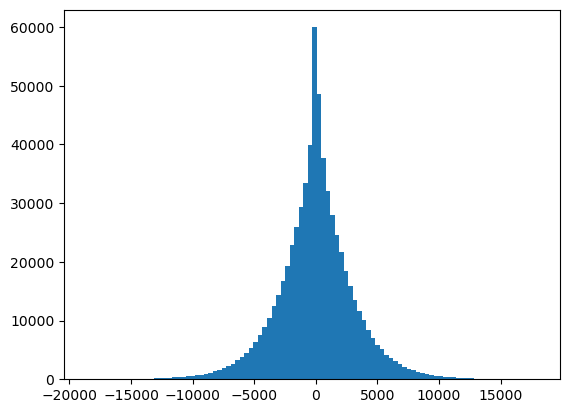

In [215]:
plt.hist(velosity_matrix_2[:, 0], bins=100)

(array([6.0000e+00, 7.0000e+00, 9.0000e+00, 8.0000e+00, 9.0000e+00,
        1.4000e+01, 1.7000e+01, 2.2000e+01, 3.1000e+01, 2.5000e+01,
        3.6000e+01, 4.4000e+01, 4.5000e+01, 6.1000e+01, 6.5000e+01,
        7.3000e+01, 8.3000e+01, 7.2000e+01, 9.7000e+01, 1.0800e+02,
        1.2500e+02, 1.4400e+02, 1.5300e+02, 1.7000e+02, 1.9600e+02,
        2.6000e+02, 2.4900e+02, 3.0700e+02, 2.9200e+02, 3.6600e+02,
        3.7400e+02, 4.4200e+02, 5.0800e+02, 5.5700e+02, 6.4100e+02,
        6.3400e+02, 7.5100e+02, 8.4400e+02, 9.0000e+02, 9.9600e+02,
        1.1080e+03, 1.2450e+03, 1.3160e+03, 1.5400e+03, 1.6770e+03,
        1.9280e+03, 1.9910e+03, 2.2140e+03, 2.4410e+03, 2.6490e+03,
        2.9740e+03, 3.2490e+03, 3.4750e+03, 3.9370e+03, 4.1120e+03,
        4.6810e+03, 5.0360e+03, 5.4390e+03, 6.0450e+03, 6.6120e+03,
        7.0790e+03, 7.6740e+03, 8.5340e+03, 9.0660e+03, 9.7280e+03,
        1.0587e+04, 1.1732e+04, 1.2645e+04, 1.3777e+04, 1.4165e+04,
        1.5340e+04, 1.6251e+04, 1.7375e+04, 1.85

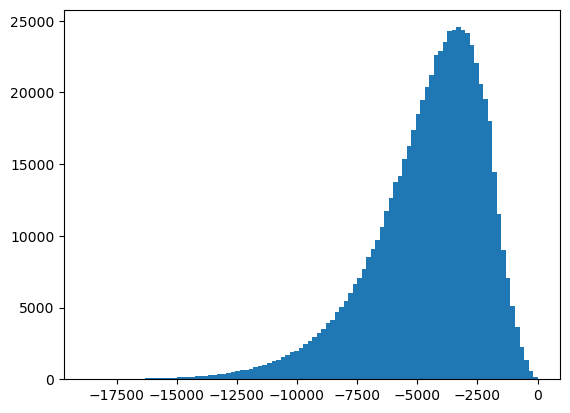

In [216]:
plt.hist(velosity_matrix_2[:, 2], bins=100)

In [217]:
rng = np.random.default_rng()
y = rng.permuted(velosity_matrix_2, axis=0)

In [198]:
print(y.shape)

(656436, 3)


(array([7.0000e+00, 5.0000e+00, 1.2000e+01, 1.3000e+01, 1.9000e+01,
        2.7000e+01, 3.9000e+01, 4.9000e+01, 4.9000e+01, 6.7000e+01,
        9.0000e+01, 9.1000e+01, 1.0300e+02, 1.2800e+02, 1.8100e+02,
        1.8200e+02, 2.3200e+02, 2.5700e+02, 2.9300e+02, 3.7800e+02,
        4.4200e+02, 5.4200e+02, 6.0800e+02, 7.5500e+02, 9.1100e+02,
        1.0670e+03, 1.1920e+03, 1.4900e+03, 1.7630e+03, 2.0950e+03,
        2.5100e+03, 2.9640e+03, 3.5030e+03, 4.0480e+03, 4.8310e+03,
        5.8070e+03, 6.6970e+03, 8.0810e+03, 9.4120e+03, 1.1199e+04,
        1.3205e+04, 1.5228e+04, 1.7935e+04, 2.0805e+04, 2.4059e+04,
        2.7374e+04, 3.1021e+04, 3.5865e+04, 4.4608e+04, 6.1808e+04,
        4.2037e+04, 3.4475e+04, 3.0159e+04, 2.6469e+04, 2.3321e+04,
        2.0262e+04, 1.7725e+04, 1.4827e+04, 1.2852e+04, 1.0947e+04,
        9.1690e+03, 7.7770e+03, 6.6770e+03, 5.4480e+03, 4.7620e+03,
        3.9120e+03, 3.4250e+03, 2.7790e+03, 2.4090e+03, 2.0390e+03,
        1.7390e+03, 1.4580e+03, 1.2490e+03, 1.07

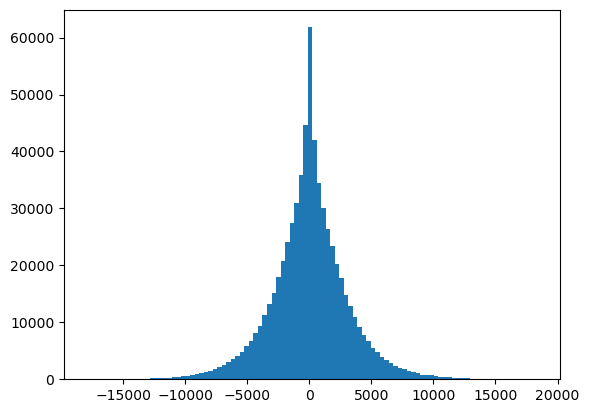

In [218]:
plt.hist(y[:, 1], bins=100)

In [5]:
from scipy.special import gamma, factorial

In [6]:
def diVr_func(d_refi, eVr, wi):
    kb = 1.380649e-23
    Tref = 300
    ev = 1.62e-19
    diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))
    return diVr

In [7]:
def Chi_b_V(b, d_refi, eVr, wi):
    return np.pi*(1 - b/diVr_func(d_refi, eVr, wi))


(0.0, 4.0)

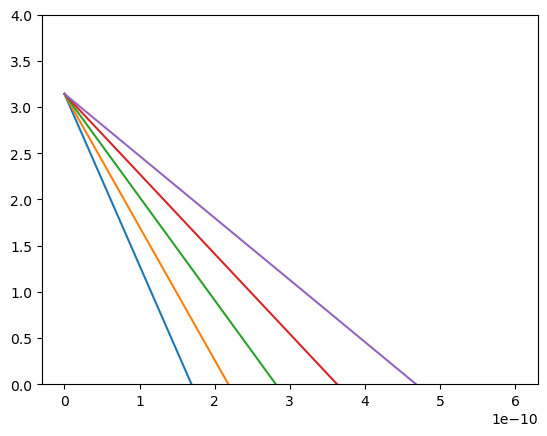

In [8]:
b = np.linspace(0, 6*1e-10, 50)

fig, ax = plt.subplots(1,1)
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 100, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 10, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 1, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 0.1, 0.721))
ax.plot(b, Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 0.01, 0.721))
ax.set_ylim(0, 4)

In [33]:
print(Chi_b_V(b, (4.614 + 4.151)/2*1e-10, 100, 0.721))

[ 3.14159265  2.91406551  2.68653836  2.45901122  2.23148408  2.00395693
  1.77642979  1.54890264  1.3213755   1.09384835  0.86632121  0.63879407
  0.41126692  0.18373978 -0.04378737 -0.27131451 -0.49884166 -0.7263688
 -0.95389595 -1.18142309 -1.40895023 -1.63647738 -1.86400452 -2.09153167
 -2.31905881 -2.54658596 -2.7741131  -3.00164024 -3.22916739 -3.45669453
 -3.68422168 -3.91174882 -4.13927597 -4.36680311 -4.59433026 -4.8218574
 -5.04938454 -5.27691169 -5.50443883 -5.73196598 -5.95949312 -6.18702027
 -6.41454741 -6.64207455 -6.8696017  -7.09712884 -7.32465599 -7.55218313
 -7.77971028 -8.00723742]


In [9]:
def DXsec(d_refi, eVr, wi, chi):
    return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)

In [10]:
def TotXsec(d_refi, eVr, wi):
    return np.pi * diVr_func(d_refi, eVr, wi)**2

C:\Users\URCS049\AppData\Local\Temp\ipykernel_33308\3033641411.py:5: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))


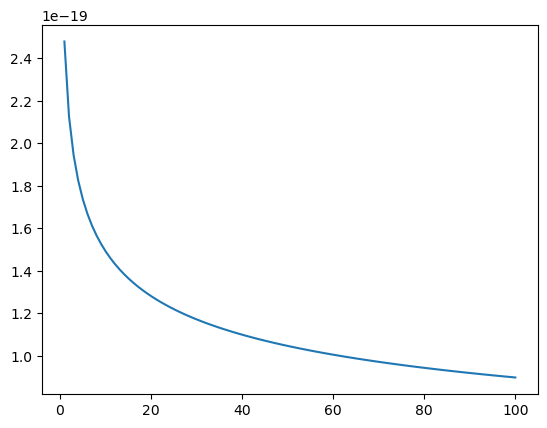

In [11]:
enery = np.linspace(0, 100, 100)

fig, ax = plt.subplots(1,1)
ax.plot(enery, TotXsec((4.614 + 4.151)/2*1e-10, enery, 0.721))


In [12]:
enery = np.linspace(0, 100, 100)
totXsection = TotXsec((4.614 + 4.151)/2*1e-10, enery, 0.721)
totXsection[0] = 0
print(totXsection)

[0.00000000e+00 2.47929900e-19 2.12716547e-19 1.94484550e-19
 1.82504529e-19 1.73722685e-19 1.66862013e-19 1.61273213e-19
 1.56583508e-19 1.52560221e-19 1.49048944e-19 1.45942278e-19
 1.43162690e-19 1.40652490e-19 1.38367664e-19 1.36273916e-19
 1.34344035e-19 1.32556092e-19 1.30892174e-19 1.29337469e-19
 1.27879602e-19 1.26508131e-19 1.25214174e-19 1.23990112e-19
 1.22829369e-19 1.21726227e-19 1.20675691e-19 1.19673368e-19
 1.18715378e-19 1.17798279e-19 1.16919004e-19 1.16074807e-19
 1.15263223e-19 1.14482031e-19 1.13729221e-19 1.13002972e-19
 1.12301628e-19 1.11623677e-19 1.10967737e-19 1.10332543e-19
 1.09716930e-19 1.09119828e-19 1.08540248e-19 1.07977278e-19
 1.07430071e-19 1.06897842e-19 1.06379862e-19 1.05875452e-19
 1.05383979e-19 1.04904851e-19 1.04437516e-19 1.03981456e-19
 1.03536187e-19 1.03101252e-19 1.02676223e-19 1.02260697e-19
 1.01854296e-19 1.01456660e-19 1.01067452e-19 1.00686353e-19
 1.00313060e-19 9.99472872e-20 9.95887637e-20 9.92372322e-20
 9.88924486e-20 9.855418

C:\Users\URCS049\AppData\Local\Temp\ipykernel_33308\3033641411.py:5: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))


In [13]:
KE = 2
Xsec_interp = np.interp(KE, enery, totXsection)
print(Xsec_interp)

2.1342081448336108e-19


C:\Users\URCS049\AppData\Local\Temp\ipykernel_33308\3033641411.py:5: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*ev))**(wi-1/2)*gamma(5/2 - wi))


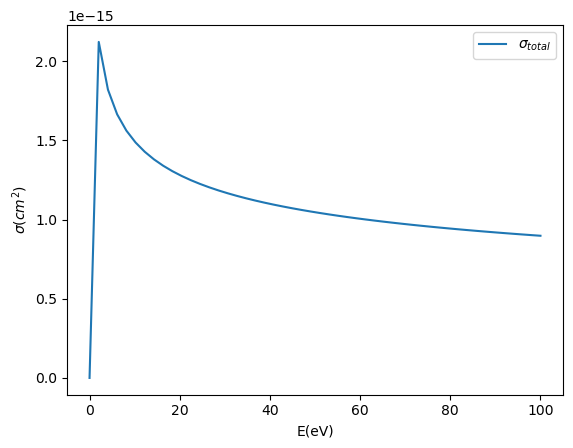

In [56]:
enery = np.linspace(0, 100, 50)
totXsection = TotXsec((4.614 + 4.151)/2*1e-8, enery, 0.721)
totXsection[0] = 0

fig, ax = plt.subplots(1,1)
ax.plot(enery, totXsection, label='$\sigma_{total}$')
ax.set_ylabel('$\sigma(cm^2)$')
# ax.set_yscale('log')
ax.set_xlabel('E(eV)')
ax.legend()

In [23]:
print(chiX.shape)

(50,)


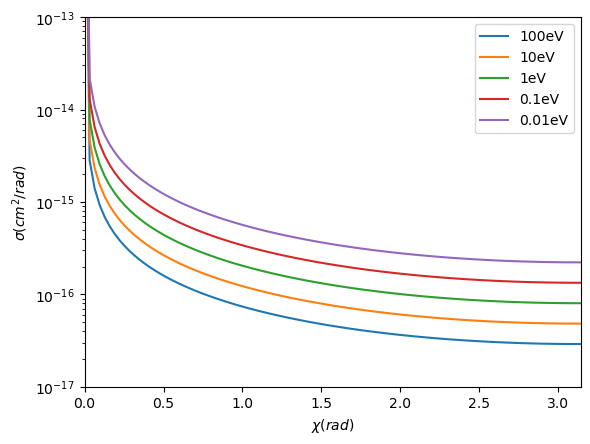

In [45]:
chiX = np.linspace(0.000001, np.pi*0.999999999, 100)

fig, ax = plt.subplots(1,1)
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 100, 0.721, chiX), label='100eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 10, 0.721, chiX), label='10eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 1, 0.721, chiX), label='1eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 0.1, 0.721, chiX), label='0.1eV')
ax.plot(chiX, DXsec((4.614 + 4.151)/2*1e-8, 0.01, 0.721, chiX), label='0.01eV')
ax.set_xlabel('$\chi(rad)$')
ax.set_xlim(0, np.pi)
ax.set_ylim(1e-17, 1e-13)
ax.set_ylabel('$\sigma(cm^2 /rad)$')
ax.set_yscale('log')
ax.legend()


In [220]:
from scipy.stats import rv_continuous
from scipy.stats.sampling import NumericalInversePolynomial

In [221]:
def DXsec(d_refi, eVr, wi, chi):
    if chi == 0:
        return 0
    if chi != 0:
        return diVr_func(d_refi, eVr, wi)**2/(np.pi * np.sin(chi))*(1 - chi/np.pi)
    

C:\Users\URCS049\AppData\Local\Temp\ipykernel_14340\27230735.py:15: RuntimeWarning: [objid: PINV.027] 102 : center moved into domain of distribution => 
  rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
C:\Users\URCS049\AppData\Local\Temp\ipykernel_14340\27230735.py:19: RuntimeWarning: [objid: PINV.028] 102 : center moved into domain of distribution => 
  rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)


[0.91871732 0.22016908 0.16485271 ... 1.22623511 1.52263734 0.37910478]


(array([84661., 66523., 54256., 45734., 39915., 34908., 30885., 28102.,
        25292., 23360., 21192., 19483., 18627., 17306., 16258., 15163.,
        14327., 13417., 12788., 12221., 11644., 10979., 10576., 10061.,
         9697.,  9430.,  8882.,  8894.,  8455.,  8329.,  7862.,  7715.,
         7431.,  7026.,  6965.,  6748.,  6669.,  6527.,  6367.,  6013.,
         6044.,  5790.,  5718.,  5402.,  5467.,  5325.,  5296.,  5191.,
         4978.,  4762.,  4895.,  4797.,  4782.,  4627.,  4402.,  4549.,
         4471.,  4245.,  4169.,  4165.,  4130.,  4115.,  3965.,  3986.,
         3898.,  3976.,  3827.,  3737.,  3707.,  3691.,  3725.,  3609.,
         3626.,  3540.,  3492.,  3586.,  3492.,  3471.,  3405.,  3502.,
         3406.,  3326.,  3328.,  3327.,  3360.,  3256.,  3282.,  3313.,
         3257.,  3251.,  3302.,  3229.,  3306.,  3206.,  3240.,  3298.,
         3356.,  3247.,  3237.,  3230.]),
 array([0.10000057, 0.13041647, 0.16083237, 0.19124827, 0.22166417,
        0.25208007, 0.2824

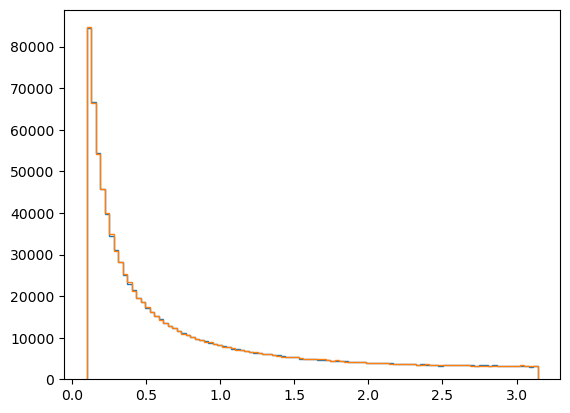

In [46]:
class DCS_gen_50(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 0.01, 0.721, x)
    

class DCS_gen_100(rv_continuous):
    "Dcs distribution"
    def _pdf(self, x):
       return DXsec((4.614 + 4.151)/2*1e-10, 100, 0.721, x)
    
urng = np.random.default_rng()

dist50 =DCS_gen_50()
rng50 = NumericalInversePolynomial(dist50, domain=[0.1, np.pi], random_state=urng)
rvs50 = rng50.rvs(size=1000000)

dist100 =DCS_gen_100()
rng100 = NumericalInversePolynomial(dist100, domain=[0.1, np.pi], random_state=urng)
rvs100 = rng100.rvs(size=1000000)
print(rvs100)
plt.hist(rvs100, bins= 100, histtype='step', stacked=True, fill=False)
plt.hist(rvs50, bins= 100, histtype='step', stacked=True, fill=False)


In [219]:
print(rvs50.shape)

NameError: name 'rvs50' is not defined

In [48]:
def DCS_pdf(energy):
    randChoice = np.random.randint(int(1e6), size=(energy.shape[0]))
    chi = rvs50[randChoice]
    return chi

In [49]:
print(DCS_pdf(np.array([0.4, 0.7, 1, 11])))

[2.89636168 0.35434869 3.12913949 0.52682838]


In [14]:
film = np.zeros((100, 100, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 50
left_side = 28
right_side = 28
film[:, 100-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[100-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [15]:
N = gen_dist_x.shape[0]
print(N)

656436


In [16]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = gen_dist_x.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[100, 100, 120], celllength=1, kdtreeN=5, tstep=1e-3)

In [17]:
filmMac = test.target_substrate(Ero_dist_x=gen_dist_x, Ero_dist_y=gen_dist_y, sub_x=0, sub_y=0)

In [18]:
print(filmMac[0].shape)
print(filmMac[0].max())
print(filmMac[0].min())

(656436,)
0.3861165745629064
0.3000679131217247


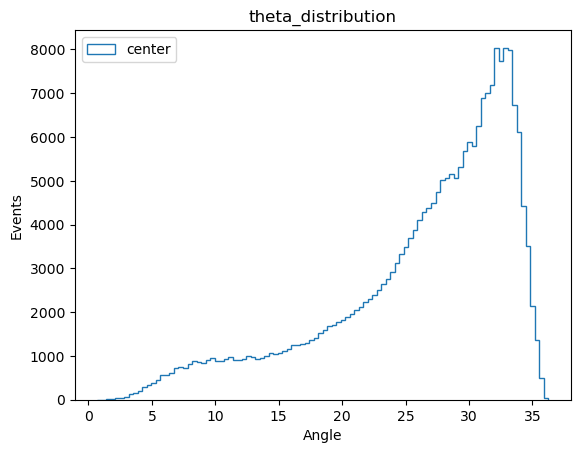

In [20]:
fig, ax = plt.subplots(1, 1)

dist_center_theta = ax.hist(filmMac[1],  weights=filmMac[0], bins=100, histtype='step',label='center')
ax.set_ylabel('Events')
ax.set_xlabel('Angle')
ax.set_title('theta_distribution')
ax.legend(loc="upper left")